In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

%matplotlib inline

# Import ETF

In [2]:
df_ETF = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='ETF_original')
df_ETF.head(5)

,Date,Open,High,Low,Close,Volume
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20
3,2019-07-24 12:00:00,35.865,35.865,35.835,35.835,6252
4,2019-07-24 11:50:00,35.865,35.875,35.865,35.875,5927


In [3]:
df_ETF['ETF_Change_in_10_min'] = (df_ETF['Close'] - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_20_min'] = (df_ETF['Close'].shift(1) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_30_min'] = (df_ETF['Close'].shift(2) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_40_min'] = (df_ETF['Close'].shift(3) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_50_min'] = (df_ETF['Close'].shift(4) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_60_min'] = (df_ETF['Close'].shift(5) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['High_minus_Low'] = df_ETF['High'] - df_ETF['Low']
df_ETF.head()

,Date,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,High_minus_Low
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500,0.000000,NaN,NaN,NaN,NaN,NaN,0.00
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635,0.000000,0.055718,NaN,NaN,NaN,NaN,0.00
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20,0.000000,0.055749,0.111498,NaN,NaN,NaN,0.00
3,2019-07-24 12:00:00,35.865,35.865,35.835,35.835,6252,-0.083647,0.027882,0.083647,0.139412,NaN,NaN,0.03
4,2019-07-24 11:50:00,35.865,35.875,35.865,35.875,5927,0.027882,-0.083647,0.027882,0.083647,0.139412,NaN,0.01


In [4]:
# df_ETF.to_excel("test3.xlsx", sheet_name = 'Test1')

In [5]:
df_ETF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41417 entries, 0 to 41416
Data columns (total 13 columns):
Date                    41417 non-null datetime64[ns]
Open                    41417 non-null float64
High                    41417 non-null float64
Low                     41417 non-null float64
Close                   41417 non-null float64
Volume                  41417 non-null int64
ETF_Change_in_10_min    41417 non-null float64
ETF_Change_in_20_min    41416 non-null float64
ETF_Change_in_30_min    41415 non-null float64
ETF_Change_in_40_min    41414 non-null float64
ETF_Change_in_50_min    41413 non-null float64
ETF_Change_in_60_min    41412 non-null float64
High_minus_Low          41417 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 4.1 MB


How to change column name

In [6]:
# df_ETF = df_ETF.rename(columns = {'Date':'Date_time'})
# df_ETF.head(5)

# Import CPI

In [7]:
df_Unem = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='CPI')
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised
0,2001-04-19,12:00:00,Mar,0.026,0.025,0.026,0.024,10,0.026,0.004,- -
1,2001-05-16,12:00:00,Apr,0.029,0.029,0.030,0.028,14,0.029,0.026,0.022
2,2001-06-18,12:00:00,May,0.034,0.034,0.034,0.033,12,0.034,0.029,0.027
3,2001-07-18,12:00:00,Jun,0.031,0.031,0.032,0.030,15,0.030,0.034,0.031
4,2001-08-17,12:00:00,Jul,0.028,0.028,0.029,0.028,10,0.028,0.03,0.029


In [8]:
df_Unem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 11 columns):
Date        224 non-null datetime64[ns]
Time        224 non-null object
Period      224 non-null object
Srv Med     224 non-null float64
Srv Avg     224 non-null float64
Srv High    224 non-null float64
Srv Low     224 non-null float64
Srv Num     224 non-null int64
Actual      224 non-null float64
Prior       224 non-null object
Revised     224 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 19.3+ KB


Creating new Date & Time Column

In [9]:
df_Unem['Date_time'] = pd.to_datetime(df_Unem['Date'].apply(str)+' '+df_Unem['Time'].apply(str))
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Date_time
0,2001-04-19,12:00:00,Mar,0.026,0.025,0.026,0.024,10,0.026,0.004,- -,2001-04-19 12:00:00
1,2001-05-16,12:00:00,Apr,0.029,0.029,0.030,0.028,14,0.029,0.026,0.022,2001-05-16 12:00:00
2,2001-06-18,12:00:00,May,0.034,0.034,0.034,0.033,12,0.034,0.029,0.027,2001-06-18 12:00:00
3,2001-07-18,12:00:00,Jun,0.031,0.031,0.032,0.030,15,0.030,0.034,0.031,2001-07-18 12:00:00
4,2001-08-17,12:00:00,Jul,0.028,0.028,0.029,0.028,10,0.028,0.03,0.029,2001-08-17 12:00:00


# Merge data sets

In [10]:
df = pd.merge(df_ETF, df_Unem, left_on='Date', right_on='Date_time')
df.head(5)

,Date_x,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,...,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Date_time
0,2019-07-17 11:00:00,35.805,35.840,35.805,35.830,11066,0.069823,0.041894,0.041894,0.083787,...,Jun F,0.012,0.012,0.013,0.012,44,0.013,0.012,- -,2019-07-17 11:00:00
1,2019-04-17 11:00:00,34.710,34.730,34.710,34.730,1943,0.057620,-0.014405,0.043215,0.144051,...,Mar F,0.014,0.014,0.015,0.014,40,0.014,0.014,0.015,2019-04-17 11:00:00
2,2019-03-15 11:00:00,33.565,33.565,33.565,33.565,2720,0.000000,0.059586,0.089379,0.208551,...,Feb F,0.015,0.015,0.015,0.013,40,0.015,0.015,0.014,2019-03-15 11:00:00
3,2019-02-22 11:00:00,32.825,32.825,32.825,32.825,1500,0.000000,0.015232,0.015232,0.076161,...,Jan F,0.014,0.014,0.016,0.014,39,0.014,0.014,0.015,2019-02-22 11:00:00
4,2018-12-17 11:00:00,30.855,30.865,30.855,30.865,25290,0.032410,0.097229,0.226868,0.162048,...,Nov F,0.020,0.020,0.022,0.019,34,0.019,0.02,0.023,2018-12-17 11:00:00


In [11]:
# df.info()

How to export Data to excel

In [12]:
# df.to_excel("test.xlsx", sheet_name = 'Test1')

Cleaning non need columns

In [13]:
df=df[['Date_time','ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min','ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Srv Med','Srv Num','Actual']]

df.head()

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual
0,2019-07-17 11:00:00,0.069823,0.041894,0.041894,0.083787,0.153610,0.209468,11066,0.035,0.012,44,0.013
1,2019-04-17 11:00:00,0.057620,-0.014405,0.043215,0.144051,0.172861,0.172861,1943,0.020,0.014,40,0.014
2,2019-03-15 11:00:00,0.000000,0.059586,0.089379,0.208551,0.283033,0.744823,2720,0.000,0.015,40,0.015
3,2019-02-22 11:00:00,0.000000,0.015232,0.015232,0.076161,0.060929,0.198020,1500,0.000,0.014,39,0.014
4,2018-12-17 11:00:00,0.032410,0.097229,0.226868,0.162048,-0.016205,-0.048614,25290,0.010,0.020,34,0.019


Creating new columns

In [14]:
df['Surprises'] = (df['Actual'] - df['Srv Med']) / df['Srv Med']*100
df.head()

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual,Surprises
0,2019-07-17 11:00:00,0.069823,0.041894,0.041894,0.083787,0.153610,0.209468,11066,0.035,0.012,44,0.013,8.333333
1,2019-04-17 11:00:00,0.057620,-0.014405,0.043215,0.144051,0.172861,0.172861,1943,0.020,0.014,40,0.014,0.000000
2,2019-03-15 11:00:00,0.000000,0.059586,0.089379,0.208551,0.283033,0.744823,2720,0.000,0.015,40,0.015,0.000000
3,2019-02-22 11:00:00,0.000000,0.015232,0.015232,0.076161,0.060929,0.198020,1500,0.000,0.014,39,0.014,0.000000
4,2018-12-17 11:00:00,0.032410,0.097229,0.226868,0.162048,-0.016205,-0.048614,25290,0.010,0.020,34,0.019,-5.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 13 columns):
Date_time               116 non-null datetime64[ns]
ETF_Change_in_10_min    116 non-null float64
ETF_Change_in_20_min    116 non-null float64
ETF_Change_in_30_min    116 non-null float64
ETF_Change_in_40_min    116 non-null float64
ETF_Change_in_50_min    116 non-null float64
ETF_Change_in_60_min    116 non-null float64
Volume                  116 non-null int64
High_minus_Low          116 non-null float64
Srv Med                 116 non-null float64
Srv Num                 116 non-null int64
Actual                  116 non-null float64
Surprises               114 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 12.7 KB


Changing Suprises from object to float

In [16]:
df['Surprises'] = pd.to_numeric(df.Surprises)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 115
Data columns (total 13 columns):
Date_time               116 non-null datetime64[ns]
ETF_Change_in_10_min    116 non-null float64
ETF_Change_in_20_min    116 non-null float64
ETF_Change_in_30_min    116 non-null float64
ETF_Change_in_40_min    116 non-null float64
ETF_Change_in_50_min    116 non-null float64
ETF_Change_in_60_min    116 non-null float64
Volume                  116 non-null int64
High_minus_Low          116 non-null float64
Srv Med                 116 non-null float64
Srv Num                 116 non-null int64
Actual                  116 non-null float64
Surprises               114 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 12.7 KB


In [18]:
df = df.replace([np.inf, -np.inf], np.nan)
df['Surprises'] = df['Surprises'].fillna(0)
df

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual,Surprises
0,2019-07-17 11:00:00,0.069823,0.041894,0.041894,0.083787,0.153610,0.209468,11066,0.035,0.012,44,0.013,8.333333
1,2019-04-17 11:00:00,0.057620,-0.014405,0.043215,0.144051,0.172861,0.172861,1943,0.020,0.014,40,0.014,0.000000
2,2019-03-15 11:00:00,0.000000,0.059586,0.089379,0.208551,0.283033,0.744823,2720,0.000,0.015,40,0.015,0.000000
3,2019-02-22 11:00:00,0.000000,0.015232,0.015232,0.076161,0.060929,0.198020,1500,0.000,0.014,39,0.014,0.000000
4,2018-12-17 11:00:00,0.032410,0.097229,0.226868,0.162048,-0.016205,-0.048614,25290,0.010,0.020,34,0.019,-5.000000
5,2018-11-16 11:00:00,0.015608,-0.156079,-0.078040,-0.202903,-0.296551,-0.280943,7126,0.020,0.022,39,0.022,0.000000
6,2018-10-17 11:00:00,-0.076628,0.030651,-0.076628,-0.183908,-0.275862,-0.168582,8428,0.035,0.021,43,0.021,0.000000
7,2018-08-17 11:00:00,0.000000,-0.072833,-0.174800,-0.247633,-0.349599,-0.378733,14084,0.005,0.021,42,0.021,0.000000
8,2018-07-18 11:00:00,-0.028333,0.028333,0.028333,0.084998,0.056665,0.141663,3949,0.025,0.020,39,0.020,0.000000
9,2018-06-15 11:00:00,0.000000,0.111701,0.139626,0.083775,0.083775,0.000000,11600,0.000,0.019,39,0.019,0.000000


In [19]:
# df.to_excel("test2.xlsx", sheet_name = 'Test1')

In [20]:
# df['ETF_Change_in_10_min'].mean()


In [21]:
data = [
        [0,0,0,],
        [df['ETF_Change_in_10_min'].min()*100,df['ETF_Change_in_10_min'].mean()*100,df['ETF_Change_in_10_min'].max()*100],
        [df['ETF_Change_in_20_min'].min()*100,df['ETF_Change_in_20_min'].mean()*100,df['ETF_Change_in_20_min'].max()*100],
        [df['ETF_Change_in_30_min'].min()*100,df['ETF_Change_in_30_min'].mean()*100,df['ETF_Change_in_30_min'].max()*100],
        [df['ETF_Change_in_40_min'].min()*100,df['ETF_Change_in_40_min'].mean()*100,df['ETF_Change_in_40_min'].max()*100],
        [df['ETF_Change_in_50_min'].min()*100,df['ETF_Change_in_50_min'].mean()*100,df['ETF_Change_in_50_min'].max()*100],
        [df['ETF_Change_in_60_min'].min()*100,df['ETF_Change_in_60_min'].mean()*100,df['ETF_Change_in_60_min'].max()*100]
       ]
df4 = pd.DataFrame(data,columns=['Min','Avg','Max'], index=['0','10','20',
                                                           '30','40',
                                                           '50','60'])
df4

,Min,Avg,Max
0,0.000000,0.000000,0.000000
10,-47.318612,-1.622162,35.143770
20,-89.670633,-1.488633,40.788579
30,-143.128126,-0.212404,57.189542
40,-194.861183,-1.835369,81.699346
50,-263.838593,-1.069132,193.714173
60,-250.043111,-0.599886,197.667523


In [22]:
# df4.to_csv(r'C:\Users\Aleksejus\VCS\Savarankiškas\Test3.csv')

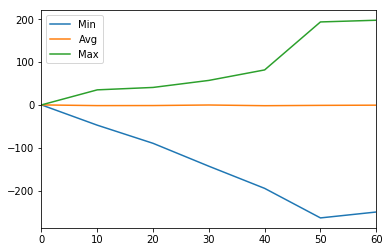

In [23]:
df4[['Min', 'Avg', 'Max']].plot()

Text(0, 0.5, 'Euro Stoxx 50 ETF %Chg')

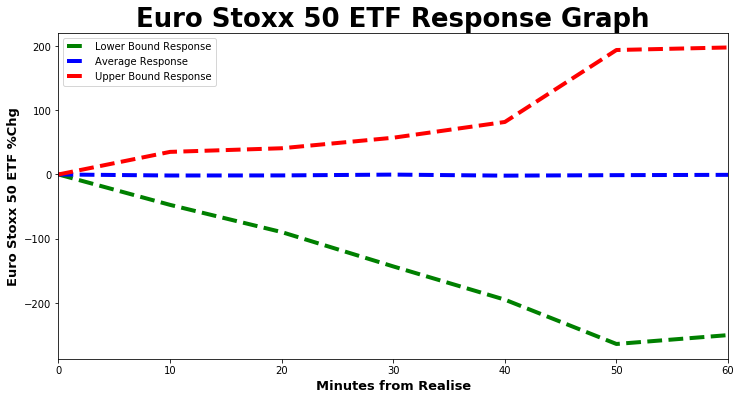

In [24]:
df4[['Min', 'Avg', 'Max']].plot(figsize=(12,6),LineWidth=4, color = ['g','b','r'], LineStyle = '--')
plt.title('Euro Stoxx 50 ETF Response Graph',fontsize=26, color='Black', weight="bold")
plt.legend(['Lower Bound Response','Average Response','Upper Bound Response'])
plt.xlabel('Minutes from Realise', fontsize=13, color='Black', weight="bold")
plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")



# Corr matrix with all data

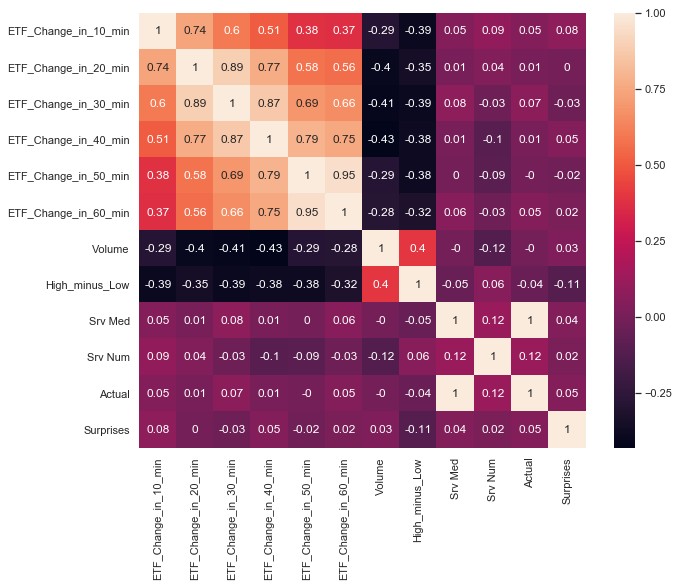

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
df0=df[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df0.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
0,0.069823,0.041894,0.041894,0.083787,0.153610,0.209468,11066,0.035,8.333333
1,0.057620,-0.014405,0.043215,0.144051,0.172861,0.172861,1943,0.020,0.000000
2,0.000000,0.059586,0.089379,0.208551,0.283033,0.744823,2720,0.000,0.000000
3,0.000000,0.015232,0.015232,0.076161,0.060929,0.198020,1500,0.000,0.000000
4,0.032410,0.097229,0.226868,0.162048,-0.016205,-0.048614,25290,0.010,-5.000000


In [27]:
# sns.pairplot(df0)

# Corr matrix and modeling where surprise values > 0

In [44]:
df1 = df[df['Surprises'] > 0]



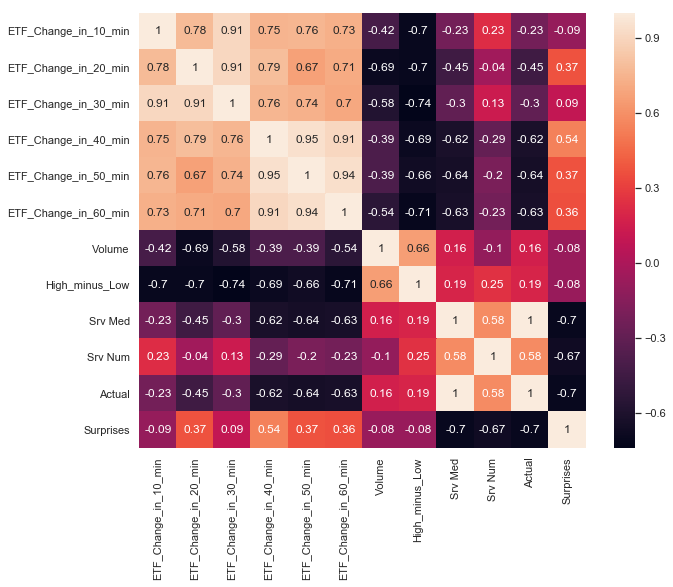

In [45]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [46]:
df1=df1[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises','Actual']]

df1.head()



,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises,Actual
0,0.069823,0.041894,0.041894,0.083787,0.153610,0.209468,11066,0.035,8.333333,0.013
33,-0.045928,0.045928,-0.061237,0.290876,0.183711,0.168402,25507,0.025,100.000000,0.002
48,-0.061538,0.000000,-0.030769,-0.061538,0.030769,0.030769,795,0.020,33.333333,0.004
55,0.047649,-0.015883,0.000000,0.063532,0.079416,0.063532,41565,0.015,14.285714,0.008
71,0.000000,-0.126476,-0.105396,0.042159,0.147555,-0.021079,37940,0.025,3.846154,0.027


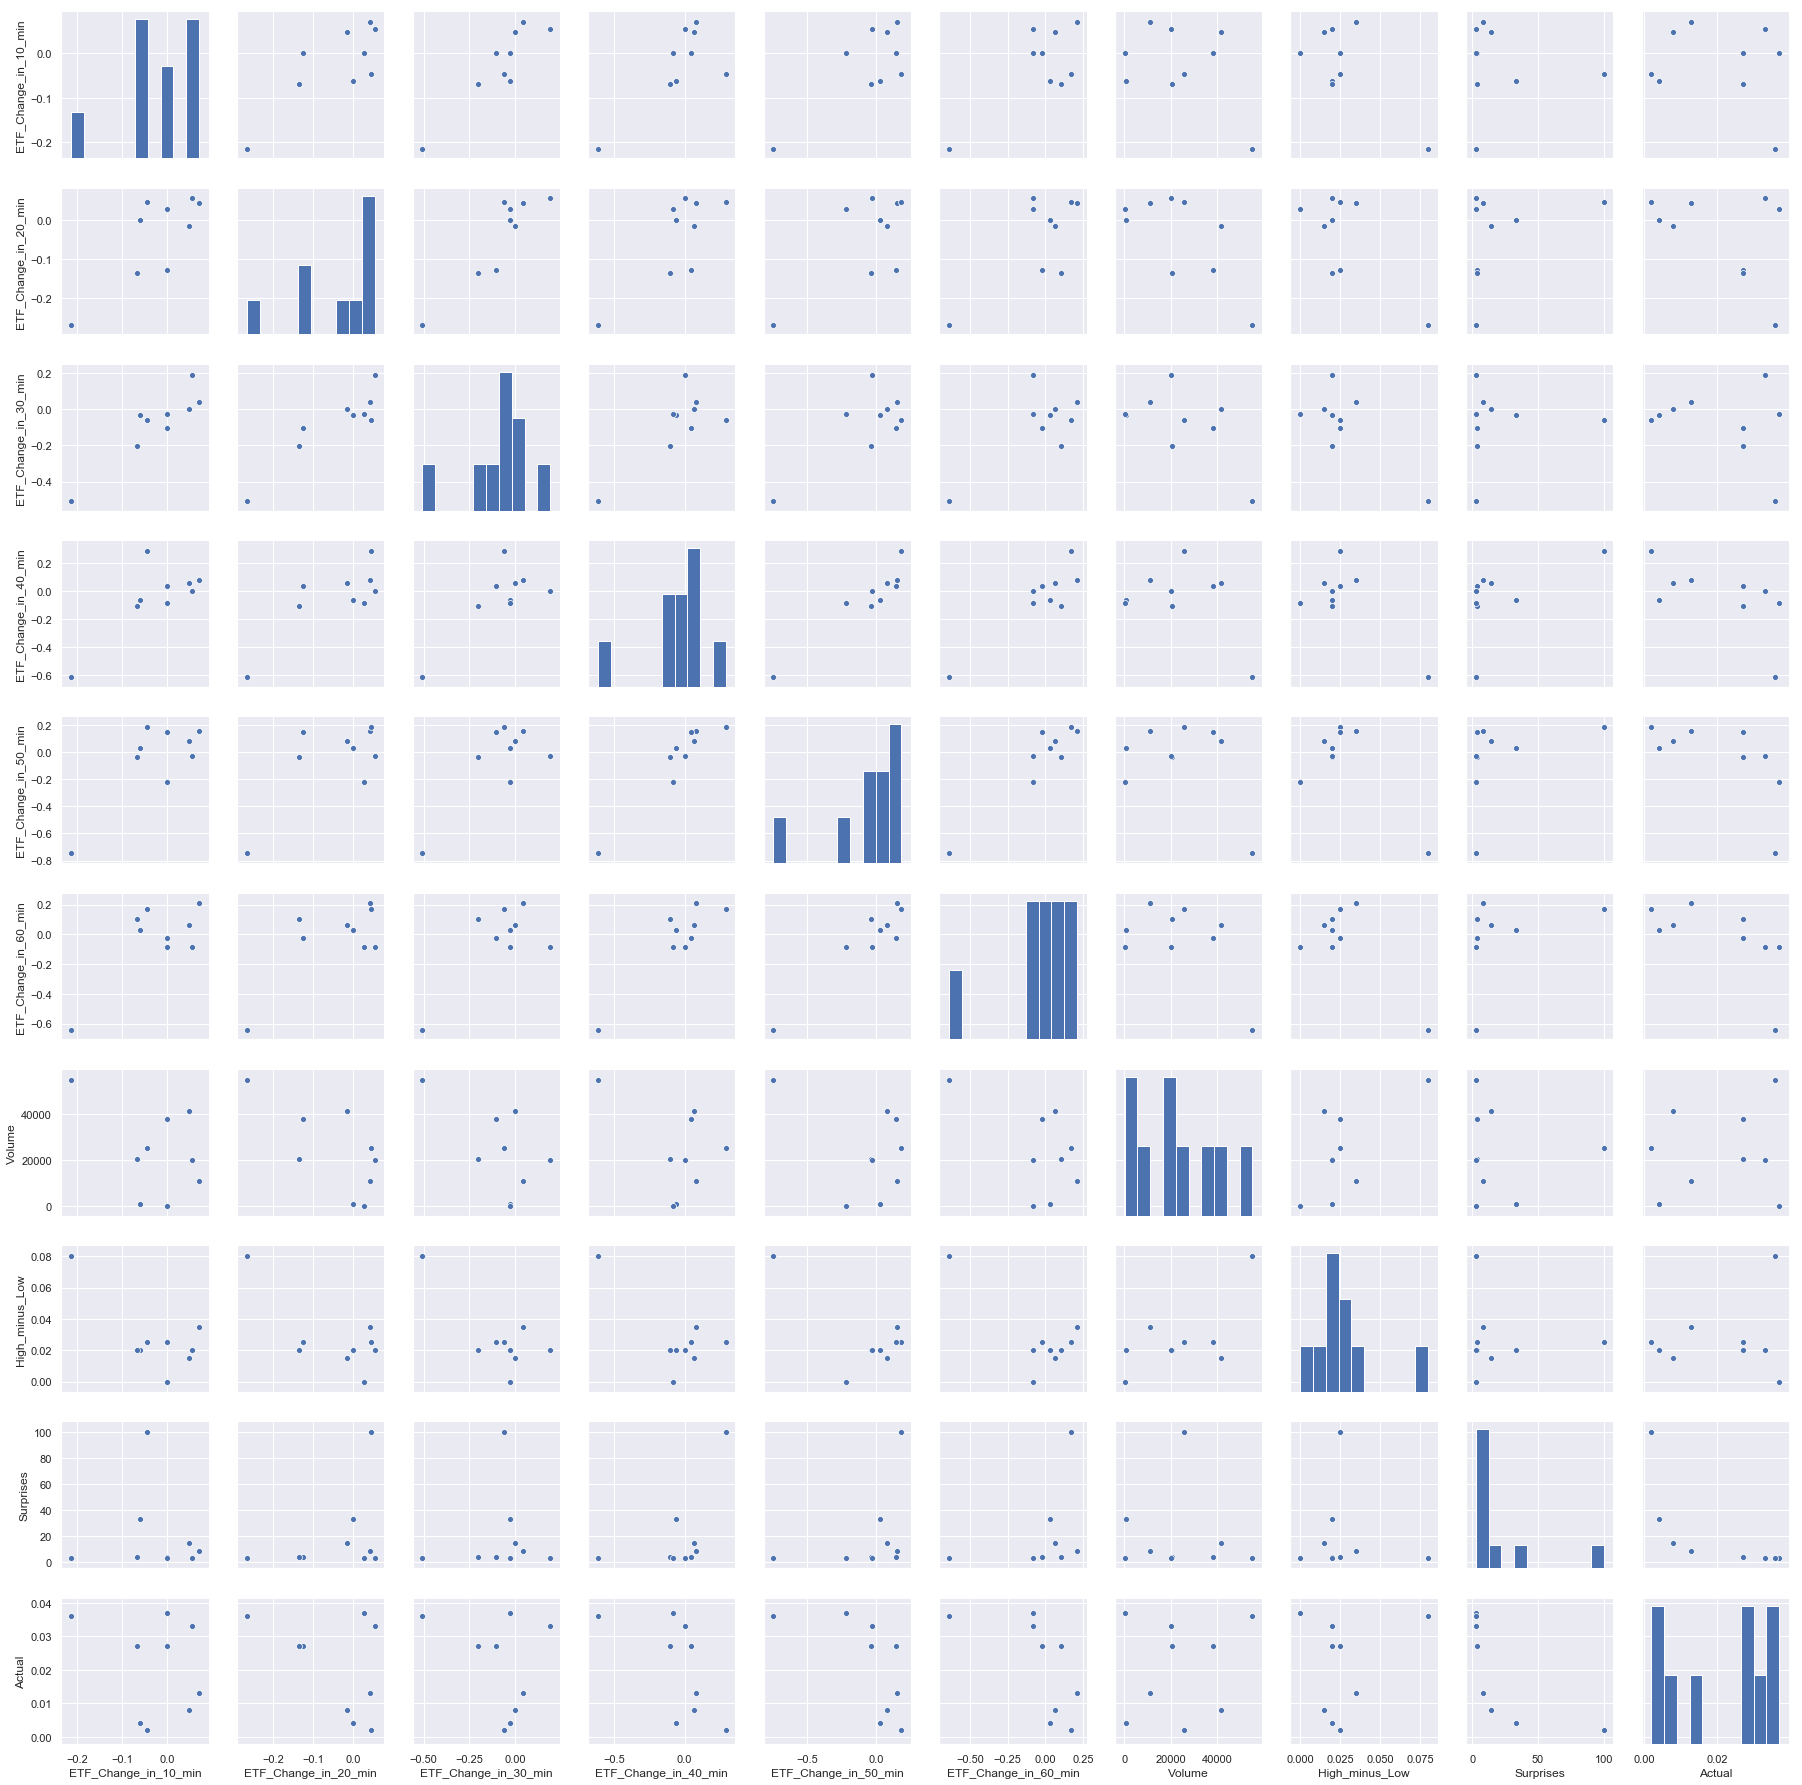

In [47]:
sns.pairplot(df1)

How drop row

In [32]:
# df1 = df1.drop(112)
# df1

# Forecasting

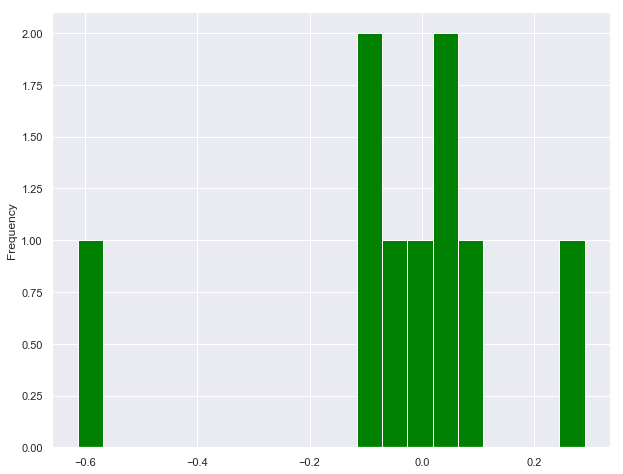

In [33]:
df1.ETF_Change_in_40_min.plot.hist(bins = 20, color = 'green')

In [49]:
est = smf.ols('ETF_Change_in_40_min ~ Surprises', df1).fit()
est.summary()

C:\Users\Aleksejus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ETF_Change_in_40_min   R-squared:                       0.291
Model:                              OLS   Adj. R-squared:                  0.190
Method:                   Least Squares   F-statistic:                     2.877
Date:                  Mon, 29 Jul 2019   Prob (F-statistic):              0.134
Time:                          22:53:41   Log-Likelihood:                 1.9762
No. Observations:                     9   AIC:                           0.04767
Df Residuals:                         7   BIC:                            0.4421
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1215      0.087     -1.396      0.205      -0.327       0.084
Surprises      0.0041      0.002      1.696      0.134      -0.002       0.010
==============================================================================
Omnibus:                       14.755   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.498
Skew:                          -1.774   Prob(JB):                       0.0388
Kurtosis:                       5.176   Cond. No.                         42.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Creating Correl Matrix where surprises values < 0

In [35]:
df2 = df[df['Surprises'] < 0]

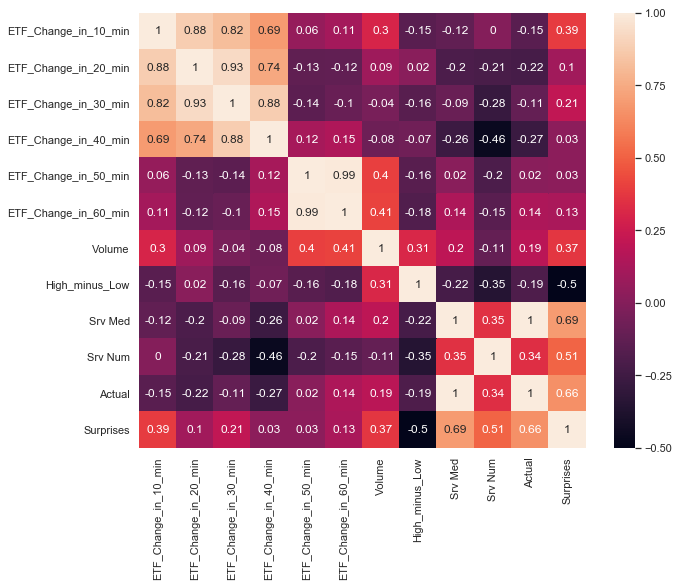

In [36]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [37]:
df2=df2[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df2.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
4,0.032410,0.097229,0.226868,0.162048,-0.016205,-0.048614,25290,0.010,-5.000000
11,0.000000,-0.071561,-0.071561,-0.214684,-0.171748,-0.186060,23,0.000,-7.142857
29,-0.278460,-0.196560,-0.163800,-0.114660,0.131040,-0.049140,400,0.085,-100.000000
31,0.000000,0.034831,0.174155,0.208986,0.139324,0.104493,794,0.000,-25.000000
36,0.061529,0.307645,0.215351,0.061529,0.184587,0.000000,5800,0.020,-50.000000


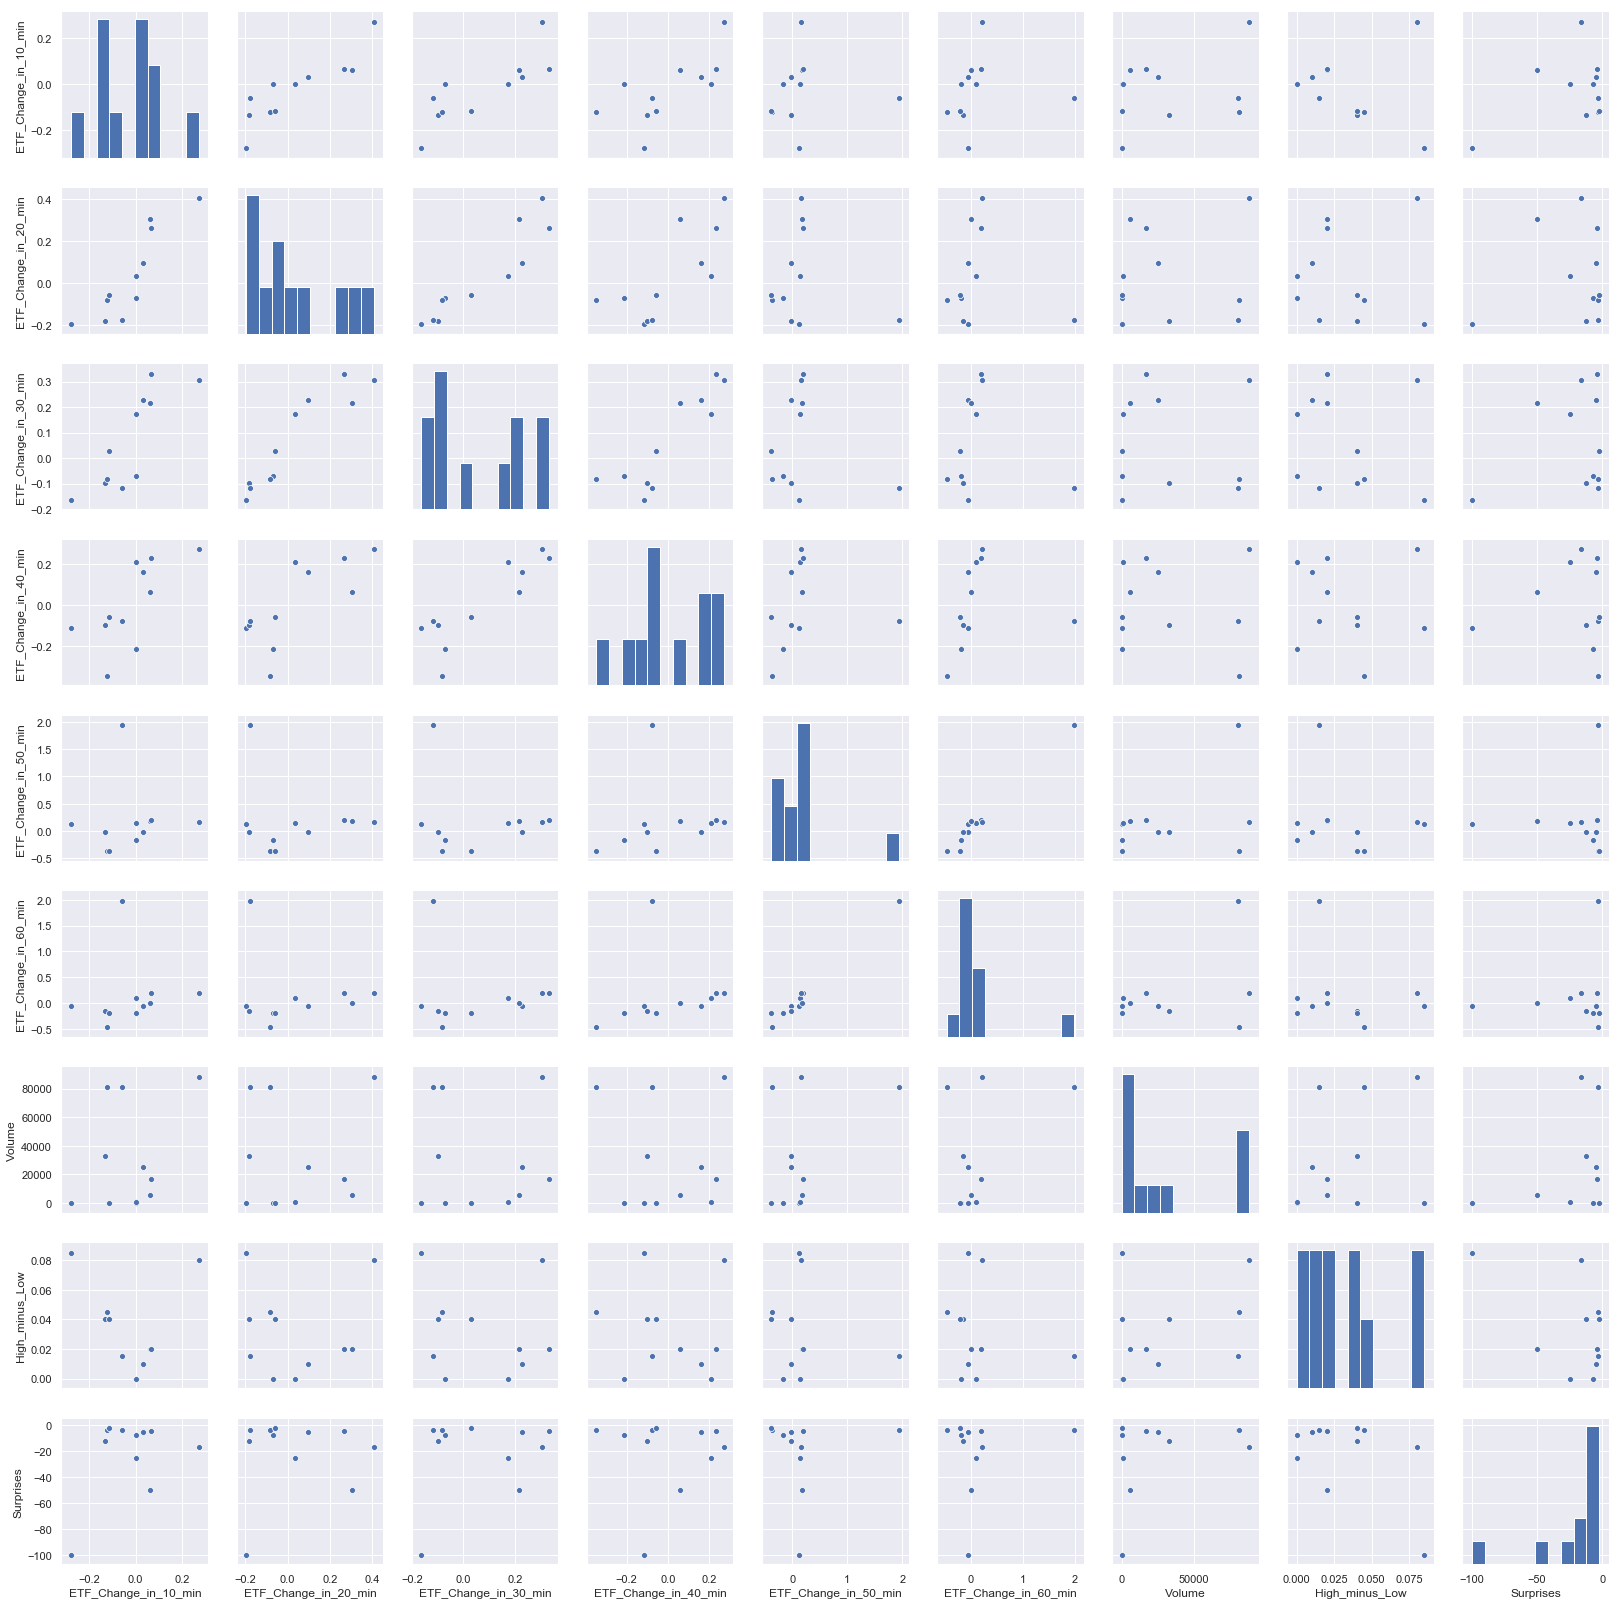

In [38]:
sns.pairplot(df2)

# Creating Correl Matrix where surprises values = 0

In [39]:
df3 = df[df['Surprises'] == 0]

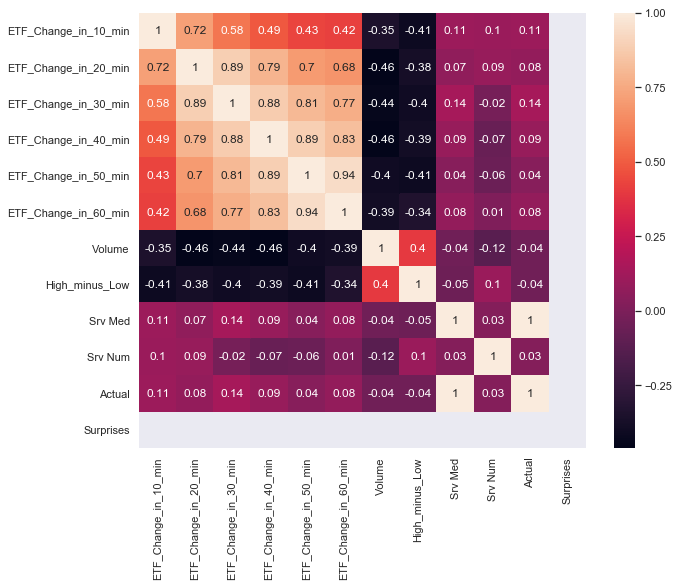

In [40]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [41]:
df3=df3[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df3.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
1,0.057620,-0.014405,0.043215,0.144051,0.172861,0.172861,1943,0.020,0.0
2,0.000000,0.059586,0.089379,0.208551,0.283033,0.744823,2720,0.000,0.0
3,0.000000,0.015232,0.015232,0.076161,0.060929,0.198020,1500,0.000,0.0
5,0.015608,-0.156079,-0.078040,-0.202903,-0.296551,-0.280943,7126,0.020,0.0
6,-0.076628,0.030651,-0.076628,-0.183908,-0.275862,-0.168582,8428,0.035,0.0


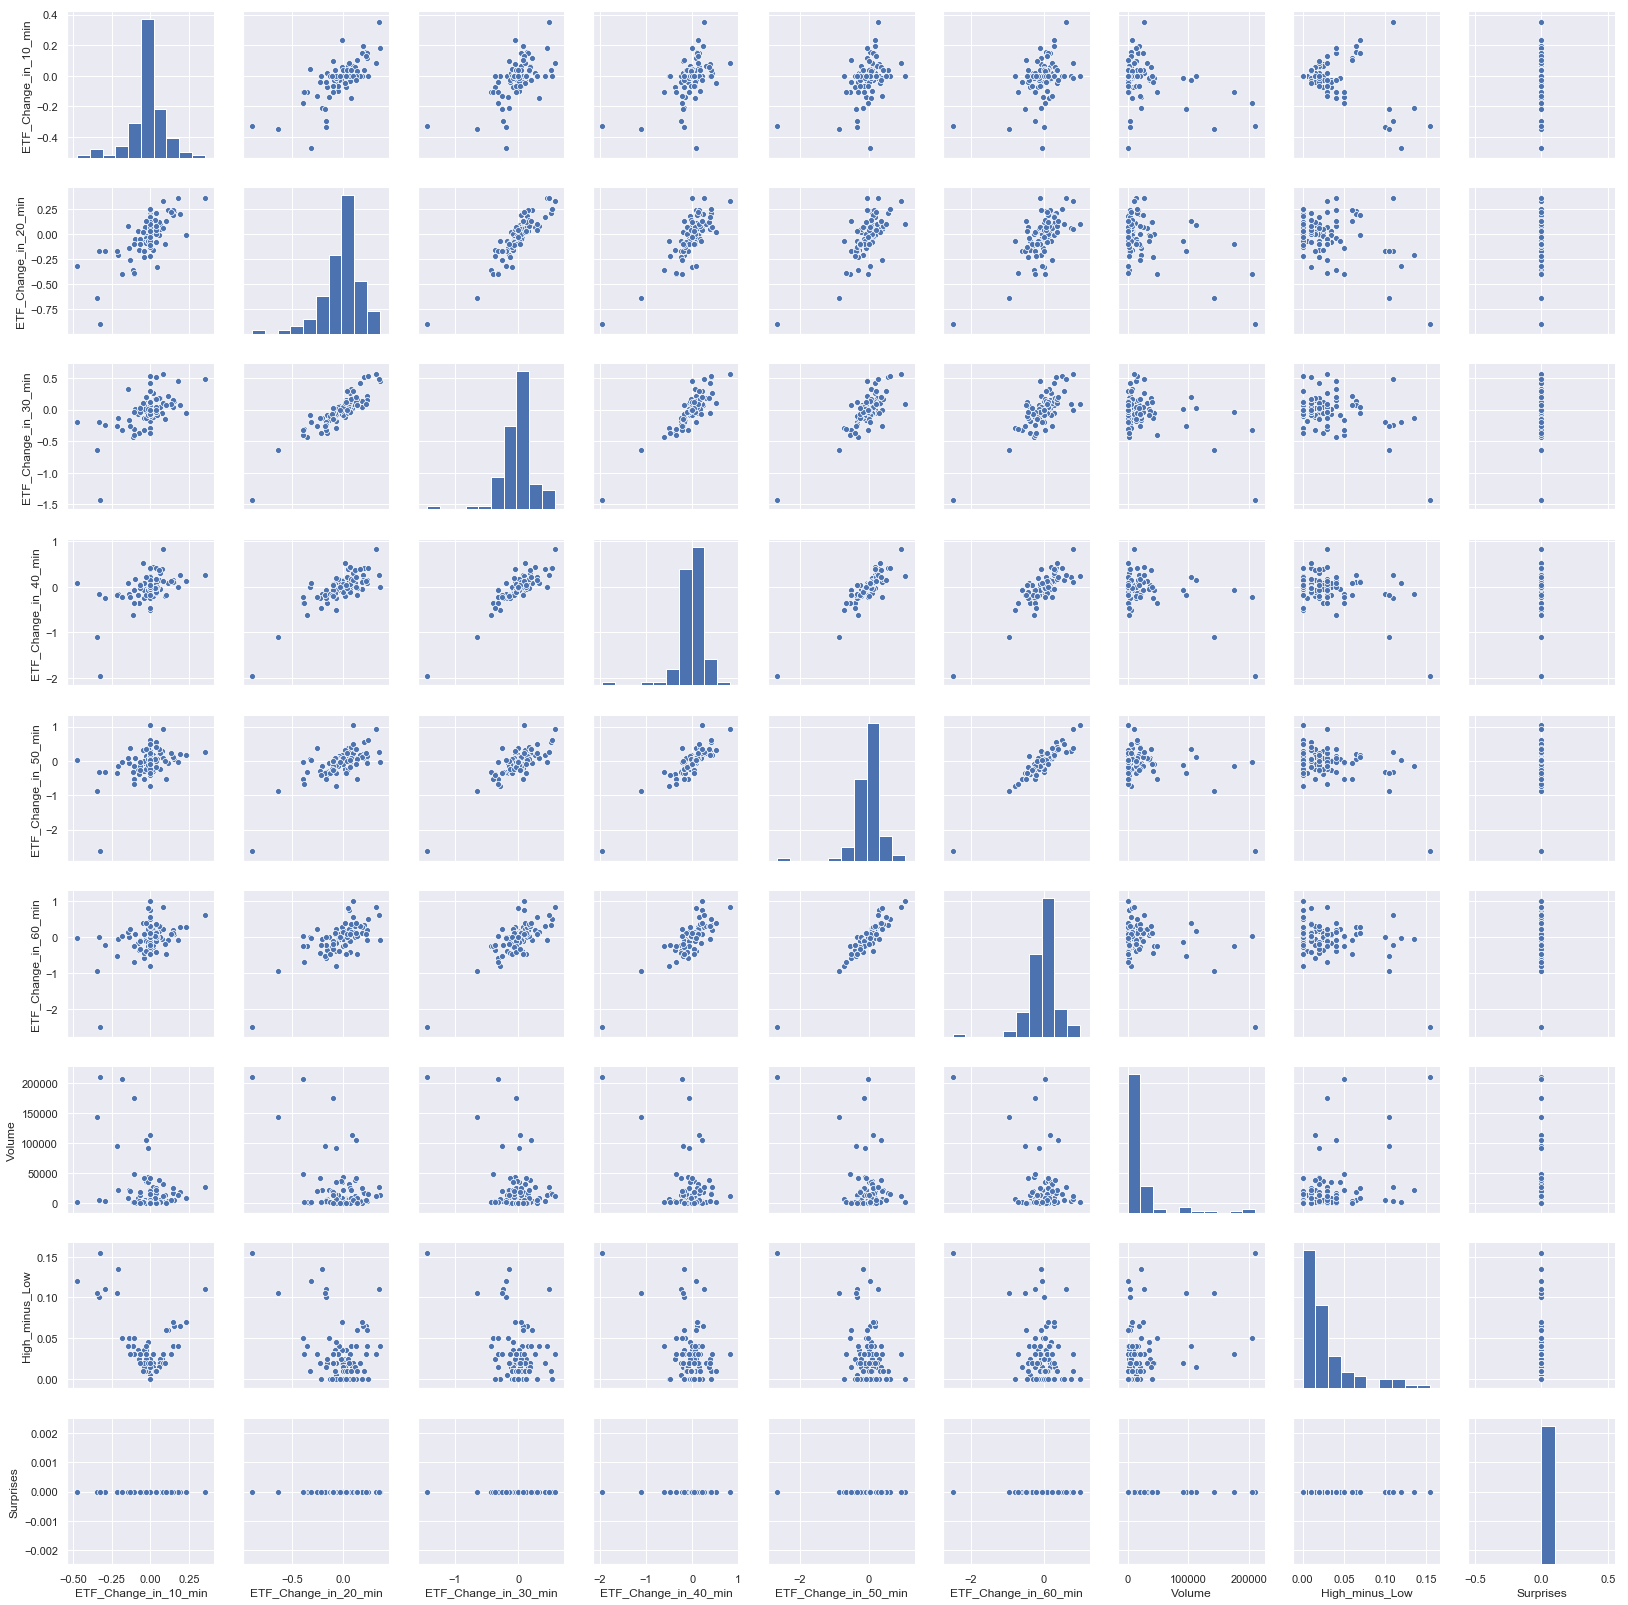

In [42]:
sns.pairplot(df3)